In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turn the project folder path into a string 
path = r'C:\Users\Kalyani\Documents\Instacart_Basket_Analysis'

In [3]:
path

'C:\\Users\\Kalyani\\Documents\\Instacart_Basket_Analysis'

In [4]:
# mporting ords_prods_merge.pkl” data set from your “Prepared Data” folder as df_ords_prods_merge
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared_data', 'ords_prods_grouped.pkl'))

In [35]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_of_prices,spender_flag,median_of_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non_frequent Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non_frequent Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non_frequent Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average Orders,10,New customer,6.367797,Low Spender,20.5,Non_frequent Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most Orders,10,New customer,6.367797,Low Spender,20.5,Non_frequent Customer


In [38]:
ords_prods_merge.shape

(32404859, 24)

# Creating Bar Charts

<Axes: xlabel='order_day_of_week'>

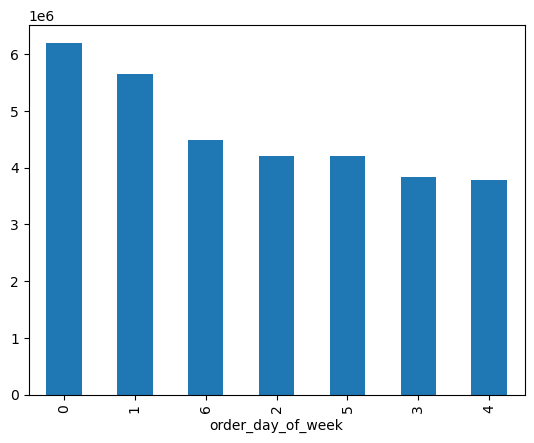

In [6]:
# Let’s try creating one for your “orders_day_of_week” column
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

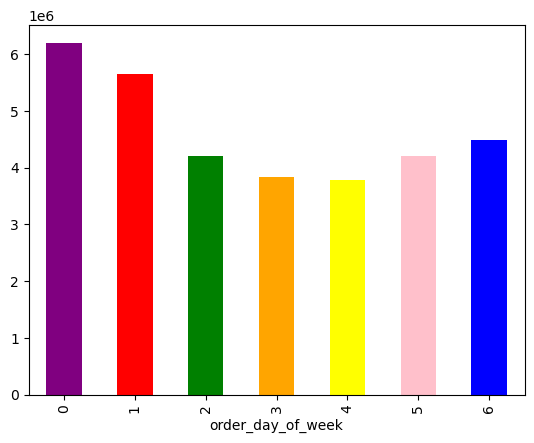

In [7]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'green', 'orange', 'yellow', 'pink', 'blue'])

# Exporting Charts

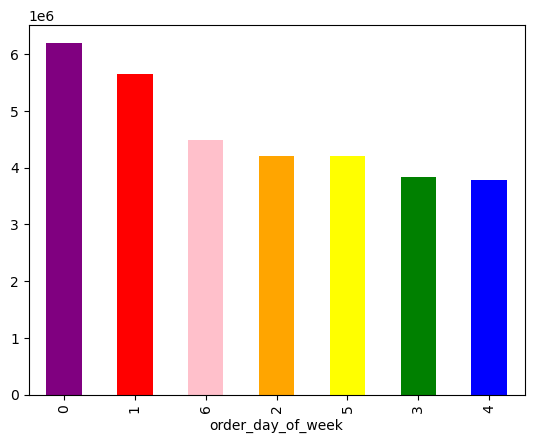

In [8]:
# The code you used above generated a preview for your visualization but didn’t save it in Jupyter’s memory. 
## You’ll need to update your command to change this:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
# The below command accesses the figure within the bar object and applies the savefig() function to it,
## Which, as you might imagine, is what “saves” the “figure” to a file. 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


# Creating Histograms and Scatterplots


<Axes: ylabel='Frequency'>

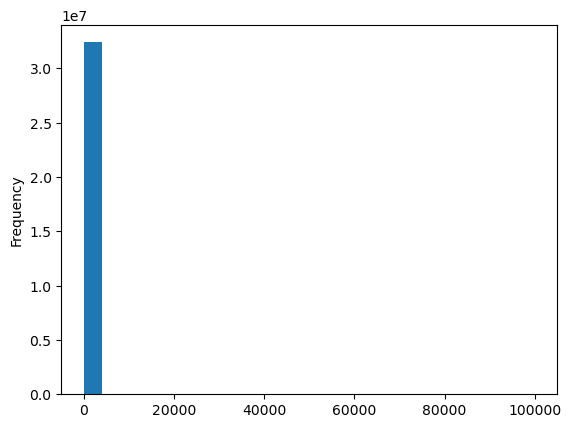

In [10]:
# Creating Histograms
ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
# Lets run describe() function to check data consistency check
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

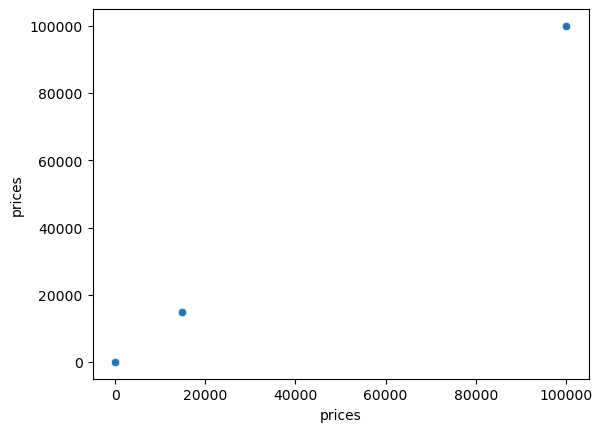

In [15]:
# We use scatterplots to visualize the distribution of data points in order to identify any outliers 
## let’s try plotting the “prices” column against itself. This will reveal whether there are any outliers.
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
# Let’s first determine whether there are any values above a certain threshold in your data
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_of_prices,spender_flag,median_of_days,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High Spender,5.0,frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High Spender,5.0,frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average Orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average Orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average Orders,16,Regular customer,114.426619,High Spender,23.0,Non_frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average Orders,39,Regular customer,1106.743956,High Spender,4.0,frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most Orders,39,Regular customer,1106.743956,High Spender,4.0,frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slowest days,Most Orders,15,Regular customer,451.153540,High Spender,5.0,frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slowest days,Average Orders,12,Regular customer,1178.381871,High Spender,12.0,Regular customer


In [17]:
# let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
ords_prods_merge['prices'].max()

25.0

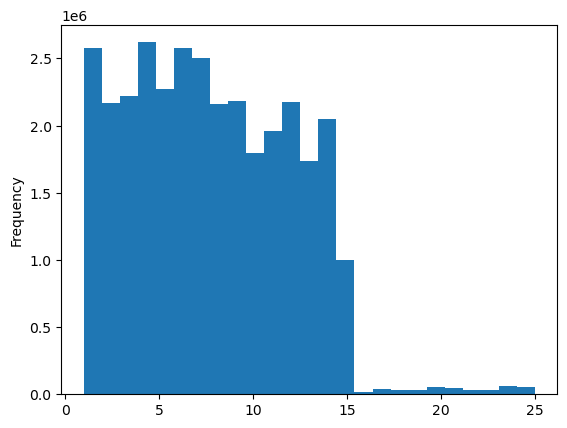

In [19]:
# we have finished up with your ad-hoc data cleaning, let’s retry that histogram of your “prices” column:

hist = ords_prods_merge['prices'].plot.hist(bins = 25)


In [20]:
# Export your histogram 
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

# Creating Line Charts

# Sampling Data

In [21]:
# Creating a sample.
np.random.seed(4)
## Creating a List to hold true/false values of dataframe
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
# WE can use your list to split your dataframe into two samples
# Store 70% of sample in dataframe big
big = ords_prods_merge[dev]

In [26]:
# Store 30% of the sample in dataframe small
small = ords_prods_merge[~dev]

In [28]:
# Let's check lenght of the original dataframe and the newly created sample data frame by using len() function
len(ords_prods_merge)

32404859

In [29]:
len(big) + len(small)

32404859

In [33]:
# Create Line chart
## Reducing your samples to only those columns necessary for the chart
df_2 = small[['order_day_of_week','prices']]